### Defining SMA Cros over Strategies


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [28]:
# One of the most polular strategies
sma_s= 50
sma_l = 200
title = f"EUR/USD - SMA{sma_s} X|SMA{sma_l}"


In [19]:
all_Data = pd.read_csv("eurusd.csv", parse_dates=["Date"], index_col="Date")


In [20]:
adj_close_df = pd.DataFrame(all_Data["Adj Close"])
price_df = adj_close_df.rename(columns={"Adj Close": "Price"})


In [21]:
price_df["SMA_S"] = price_df.Price.rolling(sma_s).mean()


In [22]:
price_df["SMA_L"] = price_df.Price.rolling(sma_l).mean()


In [23]:
# data = data.dropna

price_df


,Price,SMA_S,SMA_L
Date,,,
2018-04-02,1.231421,NaN,NaN
2018-04-03,1.229271,NaN,NaN
2018-04-04,1.227853,NaN,NaN
2018-04-05,1.228682,NaN,NaN
2018-04-06,1.225160,NaN,NaN
...,...,...,...
2023-03-28,1.080707,1.073224,1.033725
2023-03-29,1.083952,1.073317,1.033878
2023-03-30,1.084363,1.073408,1.034018


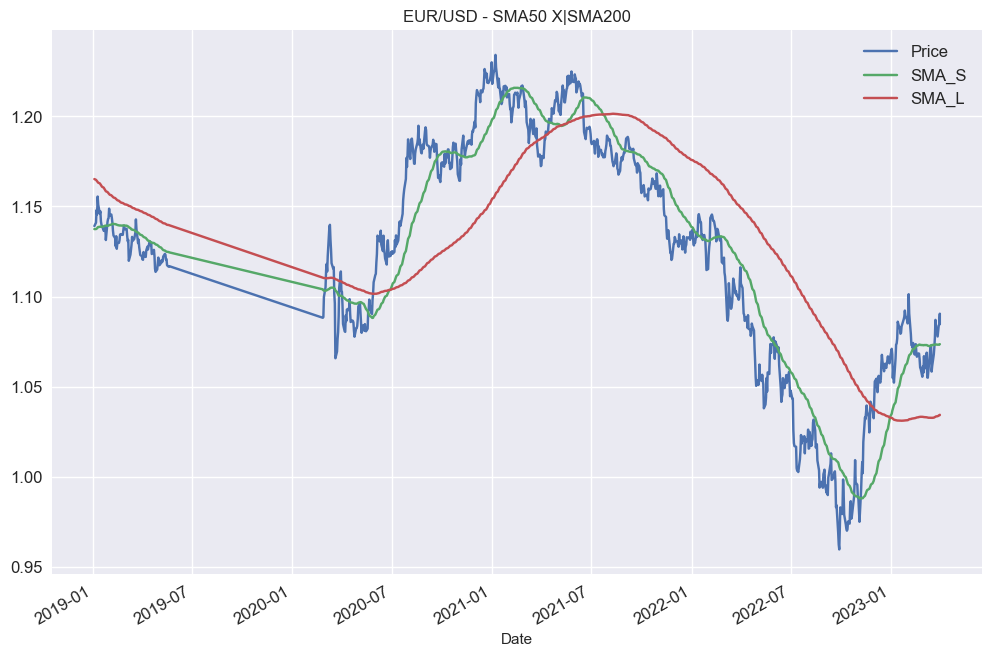

In [24]:
price_df.dropna(inplace=True)
price_df.plot(figsize=(12, 8),
              title=title, fontsize=12)
plt.legend(fontsize =12)
plt.show()


In [25]:
price_df


,Price,SMA_S,SMA_L
Date,,,
2019-01-04,1.139108,1.137421,1.165195
2019-01-07,1.141044,1.137444,1.164743
2019-01-08,1.147974,1.137651,1.164337
2019-01-09,1.145607,1.137871,1.163925
2019-01-10,1.155495,1.138347,1.163560
...,...,...,...
2023-03-28,1.080707,1.073224,1.033725
2023-03-29,1.083952,1.073317,1.033878
2023-03-30,1.084363,1.073408,1.034018


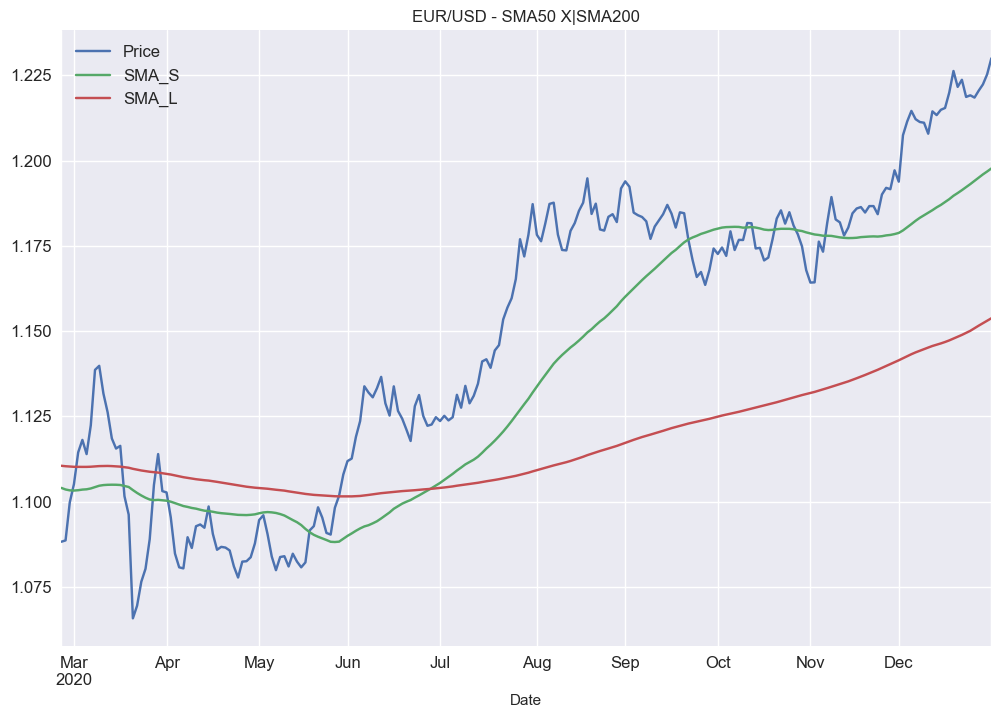

In [31]:
price_df.loc["2020"].plot(figsize=(12, 8), title =title, fontsize=12)
plt.legend(fontsize=12)
plt.show()


In [32]:
price_df["position"] = np.where(price_df["SMA_S"] > price_df["SMA_L"], 1, -1)


In [33]:
price_df


,Price,SMA_S,SMA_L,position
Date,,,,
2019-01-04,1.139108,1.137421,1.165195,-1
2019-01-07,1.141044,1.137444,1.164743,-1
2019-01-08,1.147974,1.137651,1.164337,-1
2019-01-09,1.145607,1.137871,1.163925,-1
2019-01-10,1.155495,1.138347,1.163560,-1
...,...,...,...,...
2023-03-28,1.080707,1.073224,1.033725,1
2023-03-29,1.083952,1.073317,1.033878,1
2023-03-30,1.084363,1.073408,1.034018,1


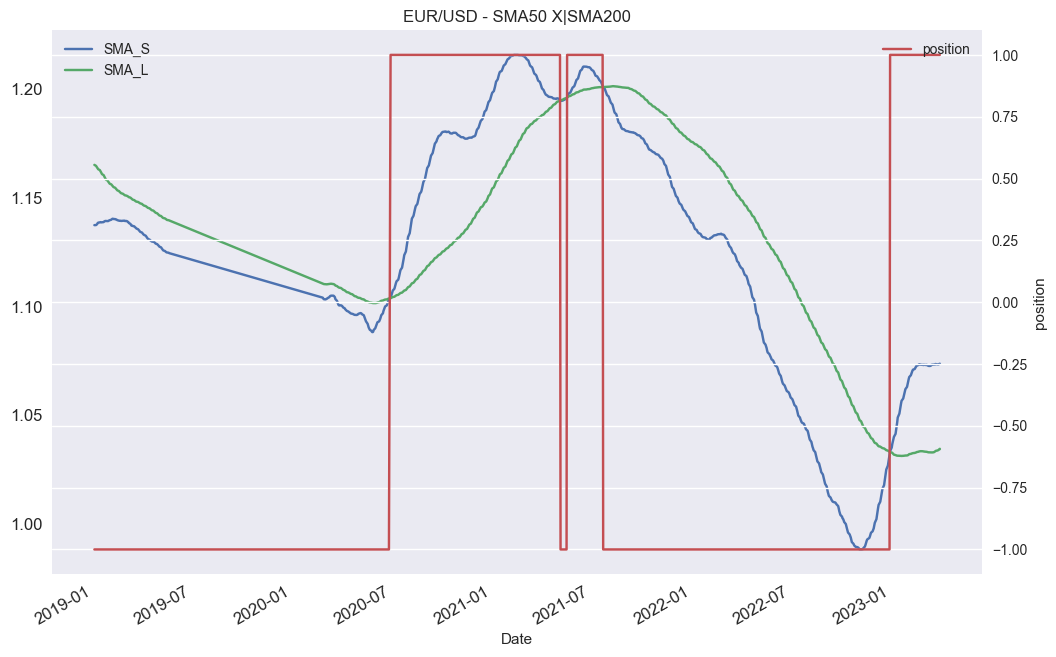

In [40]:

ax = price_df.loc[:, ["SMA_S", "SMA_L"]].plot(
    figsize=(12, 8), fontsize=12, title=title)
price_df.loc[:, "position"].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylabel('position')
ax.legend(['SMA_S', 'SMA_L'], loc='upper left')
ax.right_ax.legend(['position'], loc='upper right')
plt.show()


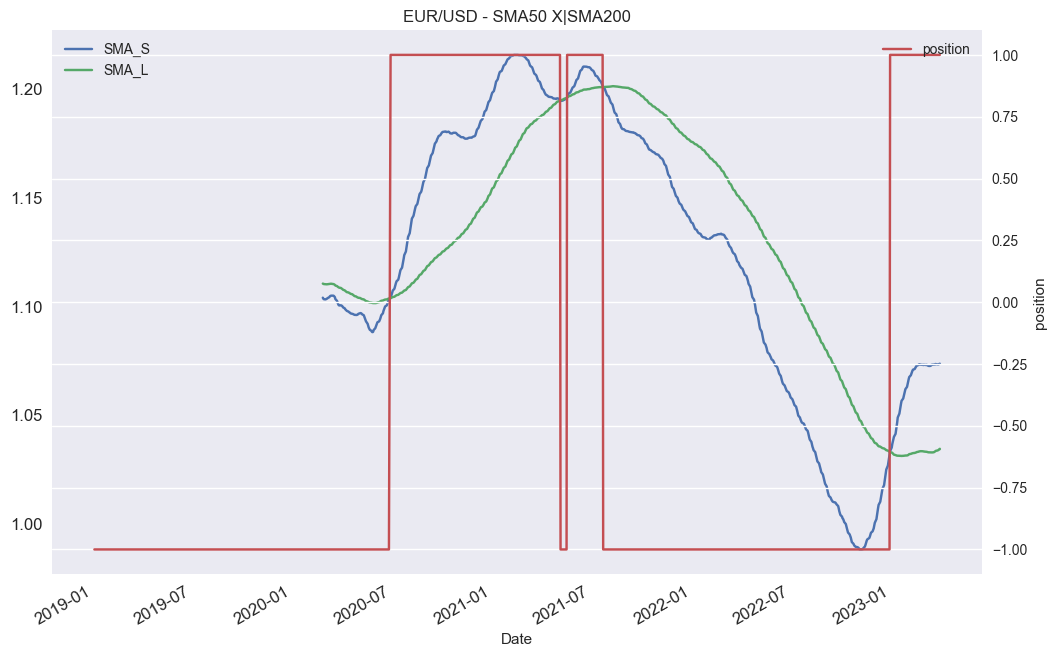

In [41]:
ax = price_df.loc["2020":, ["SMA_S", "SMA_L"]].plot(
    figsize=(12, 8), fontsize=12, title=title)
price_df.loc[:, "position"].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylabel('position')
ax.legend(['SMA_S', 'SMA_L'], loc='upper left')
ax.right_ax.legend(['position'], loc='upper right')
plt.show()
